In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

ModuleNotFoundError: No module named 'pandas'

In [ ]:
# Load the data
data = pd.read_csv("./credit_risk_data_v2.csv")

# Handle missing values
data = data.dropna()

print(data.head(5))

   loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0       5000         5000           4975.0   36 months     10.65       162.87   
1       2500         2500           2500.0   60 months     15.27        59.83   
2       2400         2400           2400.0   36 months     15.96        84.33   
3      10000        10000          10000.0   36 months     13.49       339.31   
4       3000         3000           3000.0   60 months     12.69        67.79   

  home_ownership  annual_inc verification_status  total_acc   total_pymnt  \
0           RENT     24000.0            Verified        9.0   5861.071414   
1           RENT     30000.0     Source Verified        4.0   1008.710000   
2           RENT     12252.0        Not Verified       10.0   3003.653644   
3           RENT     49200.0     Source Verified       37.0  12226.302210   
4           RENT     80000.0     Source Verified       38.0   3242.170000   

   total_pymnt_inv  total_rec_prncp  total_rec_int

In [ ]:
# Amount of rows and columns
print(data.shape)
print(data.columns)

(466256, 16)
Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'home_ownership', 'annual_inc', 'verification_status',
       'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'last_pymnt_amnt', 'status'],
      dtype='object')


In [ ]:
# Basic information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466256 entries, 0 to 466284
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            466256 non-null  int64  
 1   funded_amnt          466256 non-null  int64  
 2   funded_amnt_inv      466256 non-null  float64
 3   term                 466256 non-null  object 
 4   int_rate             466256 non-null  float64
 5   installment          466256 non-null  float64
 6   home_ownership       466256 non-null  object 
 7   annual_inc           466256 non-null  float64
 8   verification_status  466256 non-null  object 
 9   total_acc            466256 non-null  float64
 10  total_pymnt          466256 non-null  float64
 11  total_pymnt_inv      466256 non-null  float64
 12  total_rec_prncp      466256 non-null  float64
 13  total_rec_int        466256 non-null  float64
 14  last_pymnt_amnt      466256 non-null  float64
 15  status           

In [ ]:
# Describe the data
print(data.describe())

           loan_amnt    funded_amnt  funded_amnt_inv       int_rate  \
count  466256.000000  466256.000000    466256.000000  466256.000000   
mean    14317.925292   14292.451733     14223.162366      13.829513   
std      8286.339281    8274.197912      8297.216946       4.357561   
min       500.000000     500.000000         0.000000       5.420000   
25%      8000.000000    8000.000000      8000.000000      10.990000   
50%     12000.000000   12000.000000     12000.000000      13.660000   
75%     20000.000000   20000.000000     19950.000000      16.490000   
max     35000.000000   35000.000000     35000.000000      26.060000   

         installment    annual_inc      total_acc    total_pymnt  \
count  466256.000000  4.662560e+05  466256.000000  466256.000000   
mean      432.080469  7.327749e+04      25.064430   11541.137432   
std       243.480184  5.496301e+04      11.600141    8265.661898   
min        15.670000  1.896000e+03       1.000000       0.000000   
25%       256.760000

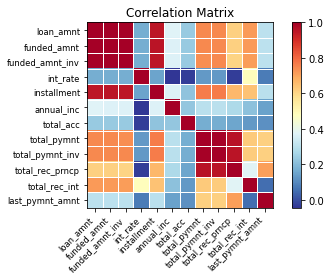

In [ ]:
# correlation with the status column
corr = data.set_index('status').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()